<a href="https://colab.research.google.com/github/apurva199/Masters-Project/blob/main/ApurvaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing neccessary python library

In [ ]:
import requests
from bs4 import BeautifulSoup as bs # pip install beautifulsoup4
import os
import re
import pandas as pd
import bs4
import requests
import spacy

from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

Code to extract abstract from webpages

In [ ]:
url = "https://pubmed.ncbi.nlm.nih.gov/?term=covid%2019"

In [ ]:
r = requests.get(url)
# Convert to a beautiful soup object
soup = bs(r.content, 'html.parser')
for link in soup.find_all('a', attrs={"class": "docsum-title"}):
  #extended_url = f"https://pubmed.ncbi.nlm.nih.gov{link.get('href')}"
  print(link.get('href'))

/32380453/
/32141569/
/32389849/
/32774178/
/32340833/
/32096567/
/32147496/
/32234466/
/32190290/
/32609256/


In [ ]:
soup.find_all('a', attrs={"class": "docsum-title"})

[<a class="docsum-title" data-article-id="32380453" data-full-article-url="from_term=covid+19&amp;from_pos=1" data-ga-action="1" data-ga-category="result_click" data-ga-label="32380453" href="/32380453/" ref="linksrc=docsum_link&amp;article_id=32380453&amp;ordinalpos=1&amp;page=1">
                 What dentists need to know about <b>COVID</b>-<b>19</b>.
               </a>,
 <a class="docsum-title" data-article-id="32141569" data-full-article-url="from_term=covid+19&amp;from_pos=2" data-ga-action="2" data-ga-category="result_click" data-ga-label="32141569" href="/32141569/" ref="linksrc=docsum_link&amp;article_id=32141569&amp;ordinalpos=2&amp;page=1">
 <b>COVID</b>-<b>19</b> (Novel <b>Coronavirus</b> <b>2019</b>) - recent trends.
               </a>,
 <a class="docsum-title" data-article-id="32389849" data-full-article-url="from_term=covid+19&amp;from_pos=3" data-ga-action="3" data-ga-category="result_click" data-ga-label="32389849" href="/32389849/" ref="linksrc=docsum_link&amp;artic

In [ ]:
extended_url = "https://pubmed.ncbi.nlm.nih.gov/32141569/"
#extended_url.append(link.get('href'))
#print(extended_url)
# Load the webpage content
r1 = requests.get(extended_url)
# Convert to a beautiful soup object
soup = bs(r1.content, 'html.parser')
try:
  abstract = soup.select("div#enc-abstract p")[0].get_text()
except IndexError:
  abstract = 'NULL'

In [ ]:
abstract

'\n      \n      The World Health Organization (WHO) has issued a warning that, although the 2019 novel coronavirus (COVID-19) from Wuhan City (China), is not pandemic, it should be contained to prevent the global spread. The COVID-19 virus was known earlier as 2019-nCoV. As of 12 February 2020, WHO reported 45,171 cases and 1115 deaths related to COVID-19. COVID-19 is similar to Severe Acute Respiratory Syndrome coronavirus (SARS-CoV) virus in its pathogenicity, clinical spectrum, and epidemiology. Comparison of the genome sequences of COVID-19, SARS-CoV, and Middle East Respiratory Syndrome coronavirus (MERS-CoV) showed that COVID-19 has a better sequence identity with SARS-CoV compared to MERS CoV. However, the amino acid sequence of COVID-19 differs from other coronaviruses specifically in the regions of 1ab polyprotein and surface glycoprotein or S-protein. Although several animals have been speculated to be a reservoir for COVID-19, no animal reservoir has been already confirmed.

In [ ]:
page = 100000
#extended_url = []
collected_abstract = []
small_collected_abstract = []
i = 0
j = 0
for pageNo in range(page):
  j += 1
  url = f"https://pubmed.ncbi.nlm.nih.gov/?term=covid%2019&page={pageNo}"
  #print(url)
  # Load the webpage content
  r = requests.get(url)
  # Convert to a beautiful soup object
  soup = bs(r.content, 'html.parser')
  for link in soup.find_all('a', attrs={"class": "docsum-title"}):
    extended_url = f"https://pubmed.ncbi.nlm.nih.gov{link.get('href')}"
    #extended_url.append(link.get('href'))
    #print(extended_url)
    # Load the webpage content
    r1 = requests.get(extended_url)
    # Convert to a beautiful soup object
    soup = bs(r1.content, 'html.parser')
    try:
      abstract = soup.select("div#enc-abstract p")[0].get_text()
    except IndexError:
      abstract = 'NULL'
    #abstract = soup.select("div#enc-abstract p")[0].get_text()
    abstract = abstract.replace('\n','')
    abstract = abstract.strip('                                                         ')
    if abstract != 'NULL':
      collected_abstract.append(abstract)
      small_collected_abstract.append(abstract)
    else:
      print('abstract not found')
    #print(j)
    if i%10 == 0:
      print(i)
    if i%50 == 0:
      collectedAbstract = ''
      collectedAbstract = collectedAbstract.join(small_collected_abstract)      
      text_file = open("/content/drive/My Drive/MasterProject/data/fileChunk" + str(i) +".txt", "w")
      n = text_file.write(collectedAbstract)
      text_file.close()
      small_collected_abstract = []
      print("/content/drive/My Drive/MasterProject/data/fileChunk" + str(i) +".txt")
    #print(abstract)
    i = i+1

#collectedAbstract = ''
#collectedAbstract = collectedAbstract.join(collected_abstract)

0
/content/drive/My Drive/MasterProject/data/fileChunk0.txt
10
abstract not found
abstract not found
abstract not found
20
30
abstract not found
40
50
/content/drive/My Drive/MasterProject/data/fileChunk50.txt
60
70
80
abstract not found
90
100
/content/drive/My Drive/MasterProject/data/fileChunk100.txt
110
abstract not found
120
abstract not found
130
140
150
/content/drive/My Drive/MasterProject/data/fileChunk150.txt
abstract not found
abstract not found
160
170
abstract not found
abstract not found
abstract not found
180
abstract not found
190
abstract not found
abstract not found
abstract not found
abstract not found
200
/content/drive/My Drive/MasterProject/data/fileChunk200.txt
abstract not found
abstract not found
210
abstract not found
abstract not found
220
230
abstract not found
240
250
/content/drive/My Drive/MasterProject/data/fileChunk250.txt
abstract not found
abstract not found
abstract not found
260
abstract not found
abstract not found
abstract not found
270
abstract n

KeyboardInterrupt: ignored

In [ ]:
collectedAbstract = ''
collectedAbstract = collectedAbstract.join(collected_abstract)

In [ ]:
text_file = open("./Dataextracted.txt", "w")
n = text_file.write(collectedAbstract)
text_file.close()

Installation of Neuralcoref

In [ ]:
mkdir temp

In [ ]:
cd temp

/content/temp


In [ ]:
!git clone https://github.com/huggingface/neuralcoref.git
!pip install -U spacy
!python -m spacy download en

Cloning into 'neuralcoref'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 753 (delta 1), reused 2 (delta 0), pack-reused 748
Receiving objects: 100% (753/753), 67.82 MiB | 31.71 MiB/s, done.
Resolving deltas: 100% (398/398), done.
     |████████████████████████████████| 10.4MB 5.5MB/s 
     |████████████████████████████████| 1.1MB 42.3MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.1MB 2.6MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=1dcab31399edc83bd3c68518883e5b0e45c74f41f00a872e2a21f02cf4d51e44
  Stored in directory: /tmp/pip-ephem-wheel-cache-x3w7gsq_/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d

In [ ]:
cd neuralcoref

/content/temp/neuralcoref


In [ ]:
!pip install -r requirements.txt
!pip install -e .
!python -m spacy download en_core_web_md en
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

Obtaining file:///content/temp/neuralcoref
     |████████████████████████████████| 133kB 4.4MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 7.1MB 20.6MB/s 
ERROR: botocore 1.19.39 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
  Running setup.py develop for neuralcoref
     |████████████████████████████████| 50.8MB 91.6MB/s 
  Created wheel for en: filename=en-0.0.1-cp36-none-any.whl size=1152 sha256=9794b933240c676add1ad78f58728e692e5eaf3da0a4fb0f441d77cbfa9dfe02
  Stored in directory: /tmp/pip-ephem-wheel-cache-h_ahmvzh/wheels/00/43/90/056879336c6fad1a3c6b467a91f507232904a939224871653c
  Created wheel for en-core-web-md: filename=en_core_web_md-2.3.1-cp36-none-any.whl size=50916643 sha256=4c4f96a1d2db677151369e3f4ab6a8804db8142d3d4f8cdd3b22abb4896abf3b
  Stored in directory: /tmp/pip-ephem-wheel-cache-h_ahmvzh/wheels/6e/65/3a/34cdc26d4084d1d1f1e2ec9914964759ea17a

In [ ]:
#code to create noun chunks
import pandas as pd
import re
import spacy
import neuralcoref
import en_core_web_sm

nlp = en_core_web_sm.load()
neuralcoref.add_to_pipe(nlp)


def get_entity_pairs(text, coref=True):
    # preprocess text
    text = re.sub(r'\n+', '.', text)  # replace multiple newlines with period
    text = re.sub(r'\[\d+\]', ' ', text)  # remove reference numbers
    text = nlp(text)
    if coref:
        text = nlp(text._.coref_resolved)  # resolve coreference clusters

    def refine_ent(ent, sent):
        unwanted_tokens = (
            'PRON',  # pronouns
            'PART',  # particle
            'DET',  # determiner
            'SCONJ',  # subordinating conjunction
            'PUNCT',  # punctuation
            'SYM',  # symbol
            'X',  # other
        )
        ent_type = ent.ent_type_  # get entity type
        if ent_type == '':
            ent_type = 'NOUN_CHUNK'
            ent = ' '.join(str(t.text) for t in
                           nlp(str(ent)) if t.pos_
                           not in unwanted_tokens and t.is_stop == False)
        elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
            refined = ''
            for i in range(len(sent) - ent.i):
                if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                    refined += ' ' + str(ent.nbor(i))
                else:
                    ent = refined.strip()
                    break

        return ent, ent_type

    sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
    ent_pairs = []
    for sent in sentences:
        sent = nlp(sent)
        spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
        spans = spacy.util.filter_spans(spans)
        with sent.retokenize() as retokenizer:
            [retokenizer.merge(span, attrs={'tag': span.root.tag,
                                            'dep': span.root.dep}) for span in spans]
        deps = [token.dep_ for token in sent]

        # limit our example to simple sentences with one subject and object
        if (deps.count('obj') + deps.count('dobj')) != 1\
                or (deps.count('subj') + deps.count('nsubj')) != 1:
            continue

        for token in sent:
            if token.dep_ not in ('obj', 'dobj'):  # identify object nodes
                continue
            subject = [w for w in token.head.lefts if w.dep_
                       in ('subj', 'nsubj')]  # identify subject nodes
            if subject:
                subject = subject[0]
                # identify relationship by root dependency
                relation = [w for w in token.ancestors if w.dep_ == 'ROOT']
                if relation:
                    relation = relation[0]
                    # add adposition or particle to relationship
                    if relation.nbor(1).pos_ in ('ADP', 'PART'):
                        relation = ' '.join((str(relation), str(relation.nbor(1))))
                else:
                    relation = 'unknown'

                subject, subject_type = refine_ent(subject, sent)
                token, object_type = refine_ent(token, sent)

                ent_pairs.append([str(subject), str(relation), str(token),
                                  str(subject_type), str(object_type)])

    ent_pairs = [sublist for sublist in ent_pairs
                          if not any(str(ent) == '' for ent in sublist)]
    pairs = pd.DataFrame(ent_pairs, columns=['subject', 'relation', 'object',
                                             'subject_type', 'object_type'])
    print('Entity pairs extracted:', str(len(ent_pairs)))

    return pairs

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Extract trpiles from text data

In [ ]:
# code to create triples and save in csv format for small chunks of triples
import os
DATA_DIR = "/content/drive/My Drive/MasterProject/data/"
files = [name for name in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, name))]
nlp_data_list = []
i = 0
for filename in files:
  print(filename)
  if not filename.endswith('.txt'): continue
  fullname = os.path.join(DATA_DIR, filename)
  f = open(fullname, "r")
  text = f.read()
  #print(text)
  #doc = nlp(text)
  df = get_entity_pairs(text)
  df.to_csv("/content/drive/My Drive/MasterProject/CSVdata/CSVdata" + str(i) +".csv")
  #print(df.head(2))
  i = i+1

fileChunk0.txt
Entity pairs extracted: 0
fileChunk50.txt
Entity pairs extracted: 30
fileChunk100.txt
Entity pairs extracted: 36
fileChunk150.txt
Entity pairs extracted: 35
fileChunk200.txt
Entity pairs extracted: 24
fileChunk250.txt
Entity pairs extracted: 24
fileChunk300.txt
Entity pairs extracted: 21
fileChunk350.txt
Entity pairs extracted: 23
fileChunk400.txt
Entity pairs extracted: 17
fileChunk450.txt
Entity pairs extracted: 30
fileChunk500.txt
Entity pairs extracted: 27
fileChunk550.txt
Entity pairs extracted: 20
fileChunk600.txt
Entity pairs extracted: 20
fileChunk650.txt
Entity pairs extracted: 19
fileChunk700.txt
Entity pairs extracted: 17
fileChunk750.txt
Entity pairs extracted: 22
fileChunk800.txt
Entity pairs extracted: 37
fileChunk850.txt
Entity pairs extracted: 22
fileChunk900.txt
Entity pairs extracted: 25
fileChunk950.txt
Entity pairs extracted: 27
fileChunk1000.txt
Entity pairs extracted: 29
fileChunk1050.txt
Entity pairs extracted: 13
fileChunk1100.txt
Entity pairs ext

In [ ]:
cd /content/drive/My Drive/MasterProject/CSVdata
ls CSVdata*.csv > filename.txt

In [ ]:
f = open("/content/drive/My Drive/MasterProject/generatedTriples/filename.txt", "r")
filename = f.read()
filename = filename.split()
f.close()
concatCSV = "/content/drive/My Drive/MasterProject/CSVdata"

filePath = []
for file in filename:
  if not file.endswith('.csv'): continue
  fullname = os.path.join(concatCSV, file)
  print(fullname)
  filePath.append(fullname)
  combined_csv = pd.concat([pd.read_csv(f) for f in fullname ])  
combined_csv = pd.concat([pd.read_csv(f) for f in filePath ])  

In [ ]:
combined_csv

,Unnamed: 0,subject,relation,object,subject_type,object_type
0,0,WHO,reported,"45,171 cases",ORG,NOUN_CHUNK
1,1,nucleocapsid N protein,has,nearly 90 % amino acid sequence identity,NOUN_CHUNK,NOUN_CHUNK
0,0,ACE2 receptor,has,central function,NOUN_CHUNK,NOUN_CHUNK
1,1,SARS CoV-2,Aims,severe respiratory syndrome,NOUN_CHUNK,NOUN_CHUNK
2,2,Wantai ELISA,provide,highest sensitivities,NOUN_CHUNK,NOUN_CHUNK
...,...,...,...,...,...,...
24,24,Virological researches,revealed,close relationship,NOUN_CHUNK,NOUN_CHUNK
25,25,Genomic studies,confirmed,role,NOUN_CHUNK,NOUN_CHUNK
26,26,Sequence analysis,revealed,novel coronavirus,NOUN_CHUNK,NOUN_CHUNK
27,27,molecular modeling analysis,supported,docking,NOUN_CHUNK,NOUN_CHUNK


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/MasterProject/finalExtractedtriples.csv")

In [ ]:
df['subject'] = df['source']
df['relation'] = df['target']
df['object'] = df['edge']

In [ ]:
df = df.drop(['source','target','edge'],axis=1)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,subject,relation,object
0,0,0,"World Health ( ) , 2019 novel ( ) from Wuhan (...",World Health Organization,issued
1,1,1,COVID-19 virus,COVID-19 earlier as 2019-nCoV. As,known
2,2,2,COVID-19 earlier as 2019-nCoV. As,COVID-19 earlier as 2019-nCoV. of 12 February,related to
3,3,3,to Severe Acute Respiratory Syndrome coronavir...,COVID-19,is similar
4,4,4,"of genome of COVID-19 , SARS - , Middle East R...",Comparison,showed
...,...,...,...,...,...
33448,457,457,Of remaining 116 from other jurisdictions,Of remaining 116 from other only 6 %,acquired.
33449,458,458,in to multiple epidemiologically linked across...,increase,is attributable
33450,459,459,"small of severe , intensive care , with fatali...",small proportion,experienced severe
33451,460,460,crude case fatality amongst Australian cases,crude case fatality rate,is


Knowledge graph creation

In [ ]:
G=nx.from_pandas_edgelist(df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

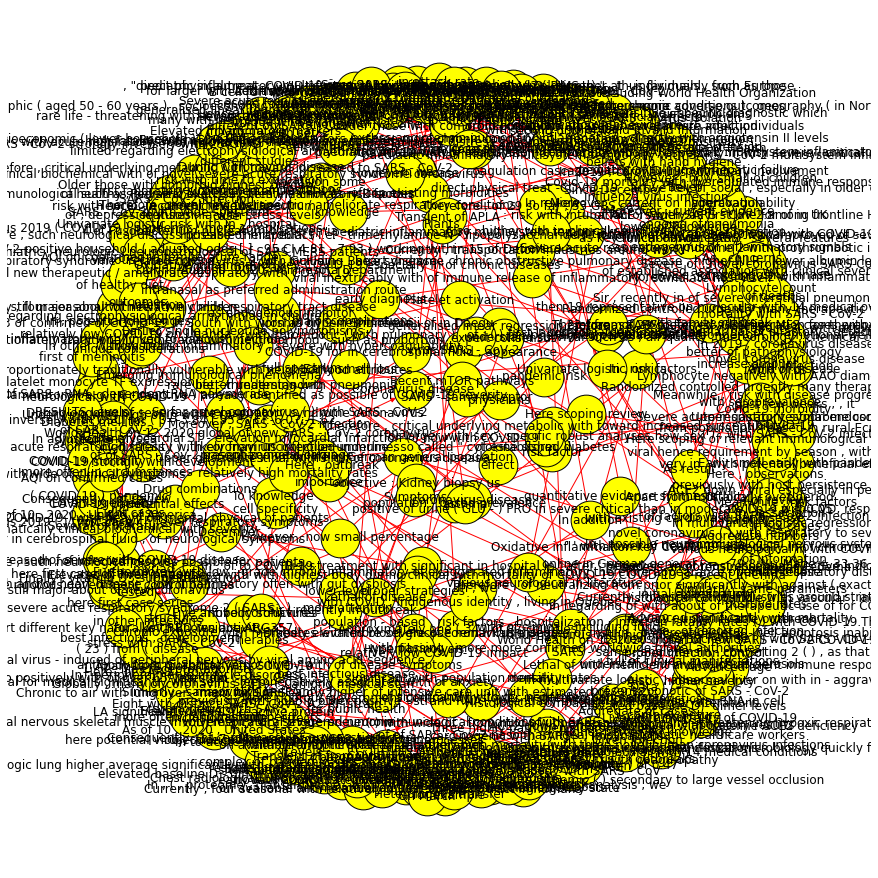

In [ ]:
G=nx.from_pandas_edgelist(df[df['edge']=="associated with"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='yellow', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, edge_color='red', edgecolors='black')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 61537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 61537 missing from current font.
  font.set_text

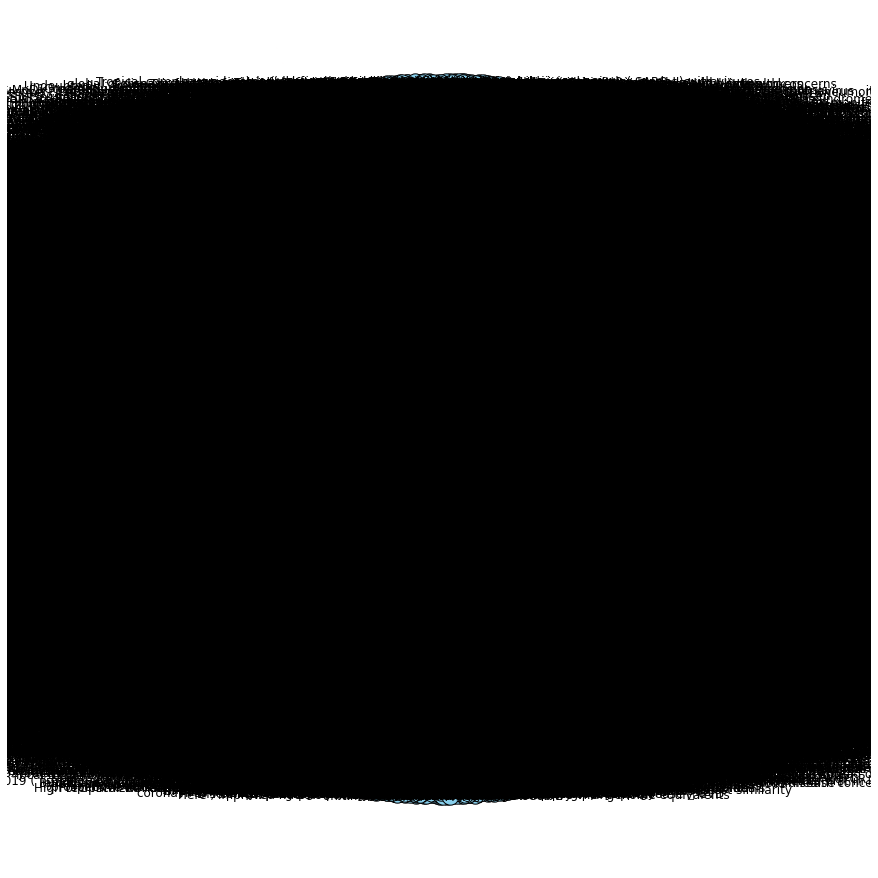

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='yellow', edge_cmap=plt.cm.Blues, pos = pos, edge_color='red', edgecolors='black')
plt.show()

Saving knowledge graph in json format

In [ ]:
pwd

'/content/temp/neuralcoref'

In [ ]:
from networkx.readwrite import json_graph
import json
import networkx as nx

G=nx.from_pandas_edgelist(df, "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
with open('./knowledgeGraph.json', 'w') as fp:
    json.dump(json_graph.node_link_data(G), fp)